In [14]:
import time
import csv
import cv2
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

In [15]:
LR = True
def read_data_fun(samples, src):
    images = [] # X_data
    angles = [] # y_data
    correction = 0.2 # this is a parameter to tune

    for line in samples:
        source_path = line[0]
        center_filename = source_path.split('/')[-1]
        current_path = './' + src + '/IMG/' + center_filename
        center_image = cv2.imread(current_path)
        center_angle = float(line[3])
        images.append(center_image)
        angles.append(center_angle)

        if LR:
            source_path = line[1]
            left_filename = source_path.split('/')[-1]
            current_path = './' + src + '/IMG/' + left_filename
            left_image = cv2.imread(current_path)
            left_angle = center_angle + correction
            images.append(left_image)
            angles.append(left_angle)            

            source_path = line[2]
            right_filename = source_path.split('/')[-1]
            current_path = './' + src + '/IMG/' + right_filename
            right_image = cv2.imread(current_path)
            right_angle = center_angle - correction
            images.append(right_image)
            angles.append(right_angle)                  
        
        
    X_data = np.array(images)[...,[2, 1, 0]]
    y_data = np.array(angles)
    return X_data, y_data

In [16]:
samples = []
start_line = 0
end_line = 500

with open('./data/driving_log.csv') as csvfile:
    line_counter = 0
    reader = csv.reader(csvfile)
    for line in reader:
        if line_counter > start_line and line_counter < end_line:
            samples.append(line)
        line_counter += 1

        

X_data, y_data = read_data_fun(samples, 'data')




In [ ]:
img_counter = 0
plt.hist(y_data, bins=10, range = (-1,1)) 


img = X_data[0]
plt.imshow(tf.image.rgb_to_hsv(img))
plt.show()    




runs = []
runningcounter = 0
angle = 0
for img, label in zip(X_data, y_data):
    #plt.imshow(img)
    #plt.show()    
    if abs(label-angle) > 0.05:
        angle = label
        runs.append(runningcounter)
        runningcounter = 0
    runningcounter += 1
    
hp = plt.hist(runs, bins=20)    
    #img_1 =cv2.resize(img,(160,80))
    #plt.imshow(img_1)
    #plt.show()


In [ ]:
def normalized_hsv (x):
    h, s, v     = tf.split(tf.image.rgb_to_hsv(x), [1, 1, 1], 2)
    v           = tf.div(v, tf.constant(255.0))
    hsv_img     = tf.concat((h,s,v),2)
    return tf.subtract(hsv_img, tf.constant(0.5))

In [ ]:
img = X_data[0]
img_hsv_1 = normalized_hsv(img)
img_hsv = tf.Session().run(img_hsv_1)

print(np.min(img_hsv[...,0]))
print(np.max(img_hsv[...,0]))
print(np.min(img_hsv[...,1]))
print(np.max(img_hsv[...,1]))
print(np.min(img_hsv[...,2]))
print(np.max(img_hsv[...,2]))
img_small = cv2.resize(img,(160,80))
plt.imshow(img)
plt.show()    
plt.imshow(img_small)
plt.show()    



0.0617599


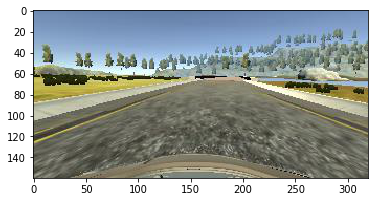

0.2617599


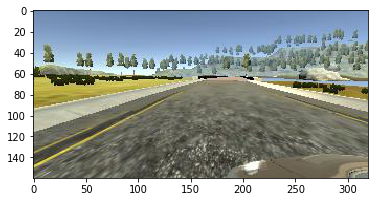

-0.1382401


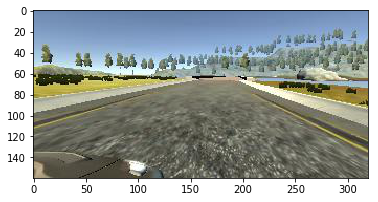

In [55]:
center = 0
for img, angle in zip(X_data, y_data):    
    if 150 + 2 < center < 150 + 4 + 2:
        if(center < 200):
            print(angle)
            plt.imshow(img)
            plt.show()
            #sv = np.random.uniform(-50,50,1)
            #print(sv[0])
            #shifted_img = tf.Session().run(  tf.contrib.image.translate(img,(sv[0],0))    )
            #M = np.float32([[1,0,sv[0]],[0,1,0]])
            #shifted_img = cv2.warpAffine(img,M,(320,160))
            #plt.imshow(shifted_img)
            #plt.show()            
    center += 1